In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [30]:
mario = cv2.imread("../opencv-np-workshop/data/img/mario.jpg")

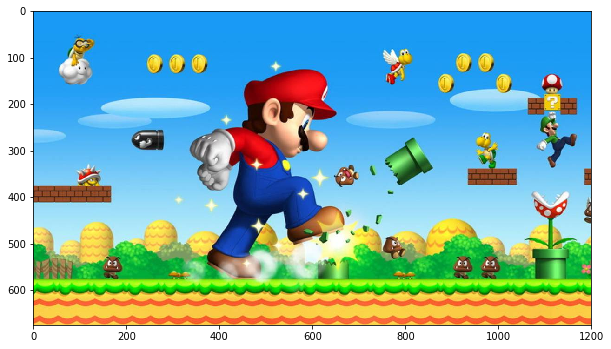

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(mario[:,:,::-1]);

## Template matching

- Take a small image (*template*) 
- On each point of the original image, we calculate the *similarity* of that region against the template.

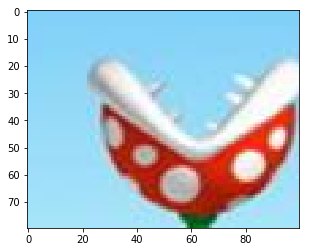

In [5]:
template = mario[370:450, 1050:1150]
plt.imshow(template[:,:,::-1])

In [6]:
res = cv2.matchTemplate(mario, template, cv2.TM_CCOEFF_NORMED)

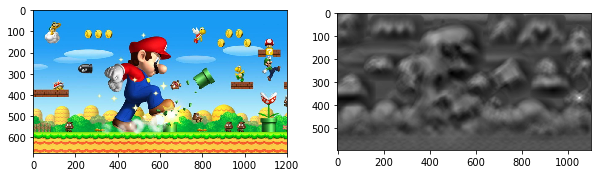

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(mario[:,:,::-1])
plt.subplot(122)
plt.imshow(res, cmap="gray")

In [11]:
cv2.minMaxLoc(res)

(-0.39653506875038147, 1.0, (497, 264), (1050, 370))

In [12]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [13]:
# max_loc is the upper left corner of the matching region's rectangle
h, w, _ = template.shape

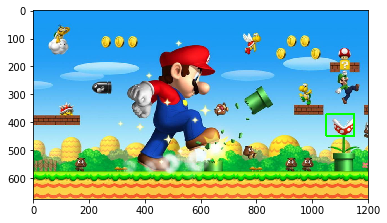

In [14]:
top_left = max_loc
bottom_right = (max_loc[0]+w, max_loc[1]+h)
cv2.rectangle(mario, top_left, bottom_right, (0,255,0), 5);
plt.imshow(mario[:,:,::-1])

### What happens if multiple objects match?

In [15]:
threshold = 0.9
loc = np.where(res>=threshold)

In [16]:
loc

(array([369, 369, 369, 370, 370, 370, 370, 370, 371, 371, 371], dtype=int64),
 array([1049, 1050, 1051, 1048, 1049, 1050, 1051, 1052, 1049, 1050, 1051],
       dtype=int64))

In [17]:
loc[0] #Matches on the "similarity heatmap" that above threshold

array([369, 369, 369, 370, 370, 370, 370, 370, 371, 371, 371], dtype=int64)

In [18]:
loc[1]

array([1049, 1050, 1051, 1048, 1049, 1050, 1051, 1052, 1049, 1050, 1051],
      dtype=int64)

In [ ]:
zip(loc[0],loc[1]) # Each 

## EXERCISE

Find all the coins in the picture.

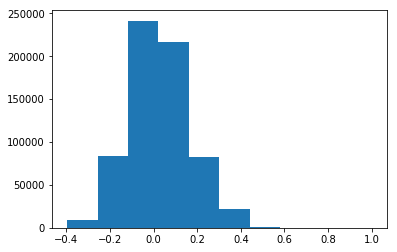

In [34]:
plt.hist(res.ravel());